In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'Times New Roman'

# Data
data = {
    "PACS": {
        "Art": [],
        "Cartoon": [],
        "Photo": [],
        "Sketch": [87.60, 87.42, 86.94, 87.40, 86.62],
    },
    "OfficeHome": {
        "Artistic": [77.6, 77.33, 77.12, 77.23, 76.71],
        "Clipart": [69.60, 69.15, 69.07, 68.48, 68.43],
        "Product": [88.60, 88.34, 88.17, 88.27, 87.88],
        "RealWorld": [88.30, 88.11, 88.07, 88.06, 87.63],
    },
    "VLCS": {
        # "Caltech": [70.0, 69.76, 69.26],
        "Labelme": [70.0, 69.76, 69.66, 69.56, 69.21],
        "Pascal": [89.9, 87.97, 87.48, 88.48, 86.21],
        "Sun": [78.0, 76.58, 77.05, 77.26, 77.59],
    },
}

# Baseline data
baseline = {
    "PACS": {
        "Art": {"CLIP-ZS": 96.53, "CLIP-A": 96.51},
        "Cartoon": {"CLIP-ZS": 98.12, "CLIP-A": 97.73},
        "Photo": {"CLIP-ZS": 99.82, "CLIP-A": 99.76},
        "Sketch": {"CLIP-ZS": 85.46, "CLIP-A": 85.92},
    },
    "OfficeHome": {
        "Artistic": {"CLIP-ZS": 75.20, "CLIP-A": 76.73},
        "Clipart": {"CLIP-ZS": 66.41, "CLIP-A": 68.42},
        "Product": {"CLIP-ZS": 86.21, "CLIP-A": 88.23},
        "RealWorld": {"CLIP-ZS": 86.46, "CLIP-A": 88.09},
    },
    "VLCS": {
        "Caltech": {"CLIP-ZS": 100.0, "CLIP-A": 99.92},
        "Labelme": {"CLIP-ZS": 70.39, "CLIP-A": 62.02},
        "Pascal": {"CLIP-ZS": 85.09, "CLIP-A": 85.65},
        "Sun": {"CLIP-ZS": 72.18, "CLIP-A": 76.99},
    },
}

# Baseline data
standard_deviation = {
    "OfficeHome": {
        "Artistic": [0.1, 0.1, 0.1, 0.1, 0.1],
        "Clipart": [0.1, 0.1, 0.1, 0.1, 0.1],
        "Product": [0.1, 0.1, 0.1, 0.1, 0.1],
        "RealWorld": [0.2, 0.2, 0.2, 0.2, 0.2],
    }
}

In [ ]:
# Plot settings
configurations = ["Use all", "rm lowest 1", "rm lowest 2", "rm highest 1", "rm highest 2"]

# Plot function
def plot_results(data, baseline, dataset_name, configurations):
    fig, axes = plt.subplots(1, len(data[dataset_name]), figsize=(20, 5), sharey=False)
    fig.suptitle(f"{dataset_name} Results", fontsize=16)

    for ax, (domain, accuracies) in zip(axes, data[dataset_name].items()):
        if accuracies:  # Only plot if there are accuracies to plot
            ax.plot(configurations[:len(accuracies)], accuracies, marker='o', label='DACA')
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-ZS" else ':'
                ax.axhline(y=value, linestyle=linestyle, label=method)
            ax.set_title(domain)
            # ax.set_xlabel("Configuration")
            ax.set_ylabel("Accuracy")
            ax.set_ylim(min(accuracies + [val for val in baseline[dataset_name][domain].values()]) - 2, 
                        max(accuracies + [val for val in baseline[dataset_name][domain].values()]) + 2)
            ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Plot results for each dataset
for dataset_name in data:
    plot_results(data, baseline, dataset_name, configurations)

In [ ]:
# Plot settings - 4 in 1 figure
# configurations = ["Use_all", "rm_lowest 1", "rm_lowest 2", "rm_highest 1", "rm_highest 2"]
configurations = ["All", "rm_L1", "rm_L2", "rm_H1", "rm_H2"]

# Plot function for a specific dataset with customized appearance
def plot_results_for_officehome(data, baseline, configurations):
    dataset_name = "OfficeHome"
    domains = list(data[dataset_name].keys())
    num_domains = len(domains)
    ncols = 4
    # nrows = (num_domains + 1) // ncols  # Calculate rows needed, rounding up if necessary
    nrows = 1
    fig, axes = plt.subplots(nrows, ncols, figsize=(40, 8), sharey=False)
    fig.suptitle(f"{dataset_name} Results", fontsize=34, fontweight='bold')

    axes = axes.flatten()  # Flatten axes array for easy iteration
    for ax, domain in zip(axes, domains):
        accuracies = data[dataset_name][domain]
        if accuracies:  # Only plot if there are accuracies to plot
            ax.plot(configurations[:len(accuracies)], accuracies, marker='o', label='DACA', linewidth=5, color='#E79A90')
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-ZS" else ':'
                # Assign colors based on method
                if method == "CLIP-ZS":
                    color = '#EFBC91'
                elif method == "CLIP-A":
                    color = '#E4CD87'
                else:
                    color = 'green'
                ax.axhline(y=value, linestyle=linestyle, label=method, linewidth=5, color=color)
            ax.set_title(domain, fontsize=32, fontweight='bold')
            # ax.set_xlabel("Configuration", fontsize=14)
            ax.set_ylabel("Accuracy(%)", fontsize=34)
            ax.tick_params(axis='both', labelsize=36)  # Set tick label size
            ax.set_ylim(min(accuracies + [val for val in baseline[dataset_name][domain].values()]) - 2, 
                        max(accuracies + [val for val in baseline[dataset_name][domain].values()]) + 2)
            ax.legend(fontsize=28)
        else:
            ax.set_visible(False)  # Hide unused subplots

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig("./NumAda_OfficeHome_Results_Styled.pdf")  # Save the figure as a PDF
    plt.show()

# Generate and save the plot for the "OfficeHome" dataset
plot_results_for_officehome(data, baseline, configurations)

In [ ]:
# Plot settings
configurations = ["All", "rm_L1", "rm_L2", "rm_H1", "rm_H2"]

# Bar plot function for a specific dataset with customized appearance
def plot_results_for_officehome(data, baseline, configurations):
    dataset_name = "OfficeHome"
    domains = list(data[dataset_name].keys())
    
    for domain in domains:
        fig, ax = plt.subplots(figsize=(6, 4))
        accuracies = data[dataset_name][domain]
        if accuracies:  # Only plot if there are accuracies to plot
            # Create bar chart for accuracies
            bar_width = 0.35
            index = range(len(accuracies))
            ax.bar(index, accuracies, bar_width, label='LGDA', color='#E79A90')
            
            # Plot baseline values as horizontal lines
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-ZS" else ':'
                color = '#EFBC91' if method == "CLIP-ZS" else '#E4CD87'
                ax.axhline(y=value, linestyle=linestyle, label=method, linewidth=2, color=color)
                
            ax.set_title(domain, fontsize=20, fontweight='bold')
            ax.set_ylabel("Accuracy (%)", fontsize=16)
            ax.set_xticks(index)
            ax.set_xticklabels(configurations, rotation=45)
            ax.tick_params(axis='both', labelsize=14)
            ax.set_ylim(min(accuracies + list(baseline[dataset_name][domain].values())) - 2, 
                        max(accuracies + list(baseline[dataset_name][domain].values())) + 2)
            ax.legend(fontsize=12)
        plt.tight_layout()
        plt.savefig(f"./NumAda_OfficeHome_Results_{domain}_Styled_Bar.pdf")  # Save each figure as a separate PDF
        plt.show()

# Generate and save the bar charts for the "OfficeHome" dataset
plot_results_for_officehome(data, baseline, configurations)

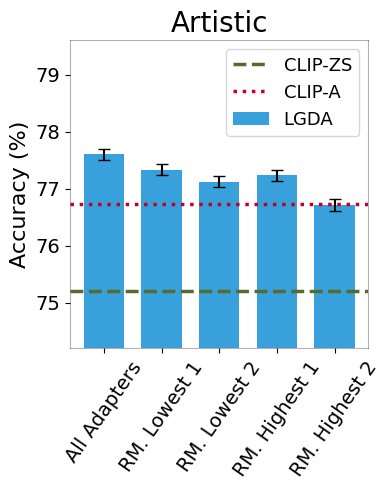

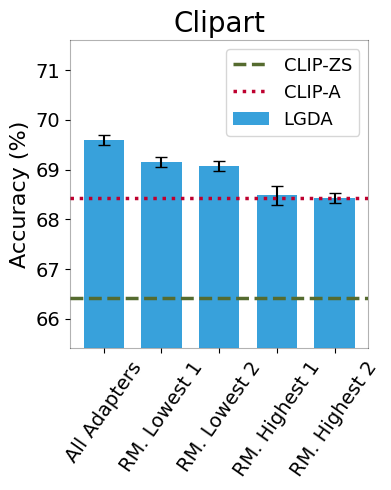

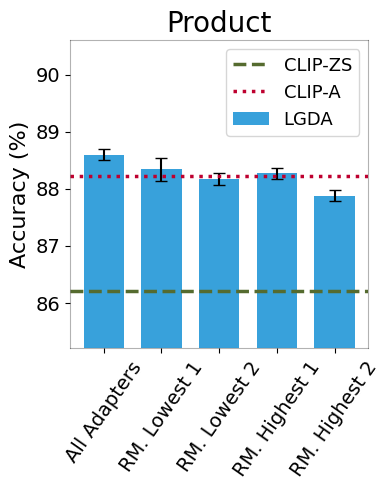

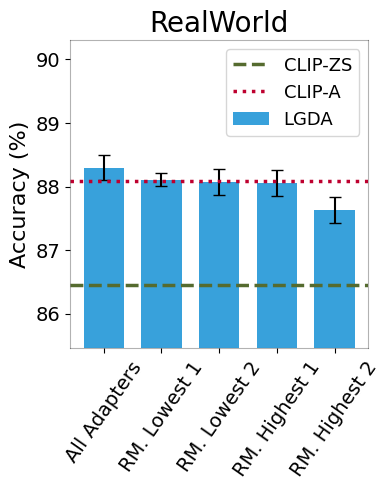

In [66]:
# Plot settings - 4 separate figures
configurations = [
    "All Adapters", 
    "RM. Lowest 1", 
    "RM. Lowest 2", 
    "RM. Highest 1", 
    "RM. Highest 2"
]

# Bar plot function for a specific dataset with customized appearance
def plot_results_for_officehome(data, baseline, configurations, standard_deviation):
    dataset_name = "OfficeHome"
    domains = list(data[dataset_name].keys())
    
    for domain in domains:
        fig, ax = plt.subplots(figsize=(4, 5))
        accuracies = data[dataset_name][domain]
        std_devs = standard_deviation[dataset_name][domain]  # Get standard deviations for the domain
        if accuracies:  # Only plot if there are accuracies to plot
            # Create bar chart for accuracies with standard deviation
            bar_width = 0.7
            index = range(len(accuracies))
            ax.bar(index, accuracies, bar_width, yerr=std_devs, label='LGDA', color='#38A1DB', capsize=4)
            
            # Plot baseline values as horizontal lines
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-ZS" else ':'
                color = '#556B2F' if method == "CLIP-ZS" else '#BE002F'
                ax.axhline(y=value, linestyle=linestyle, label=method, linewidth=2.5, color=color)
                
            # Set title and labels
            ax.set_title(domain, fontsize=20)
            ax.set_ylabel("Accuracy (%)", fontsize=16)
            ax.set_xticks(index)
            ax.set_xticklabels(configurations, rotation=55)
            ax.tick_params(axis='x', labelsize=14)
            ax.tick_params(axis='y', labelsize=14)
            ax.set_ylim(min(accuracies + list(baseline[dataset_name][domain].values())) - 1, 
                        max(accuracies + list(baseline[dataset_name][domain].values())) + 2)
            ax.legend(fontsize=13)
            
            # Lighten border lines
            ax.spines['top'].set_alpha(0.3)
            ax.spines['right'].set_alpha(0.3)
            ax.spines['left'].set_alpha(0.3)
            ax.spines['bottom'].set_alpha(0.3)
            
        plt.tight_layout()
        plt.savefig(f"./NumAda_OfficeHome_Results_{domain}_Styled_Bar.pdf")  # Save each figure as a separate PDF
        plt.show()

# Standard deviation data
standard_deviation = {
    "OfficeHome": {
        "Artistic": [0.1, 0.1, 0.1, 0.1, 0.1],
        "Clipart": [0.1, 0.1, 0.1, 0.2, 0.1],
        "Product": [0.1, 0.2, 0.1, 0.1, 0.1],
        "RealWorld": [0.2, 0.1, 0.2, 0.2, 0.2],
    }
}

# Generate and save the bar charts for the "OfficeHome" dataset
plot_results_for_officehome(data, baseline, configurations, standard_deviation)


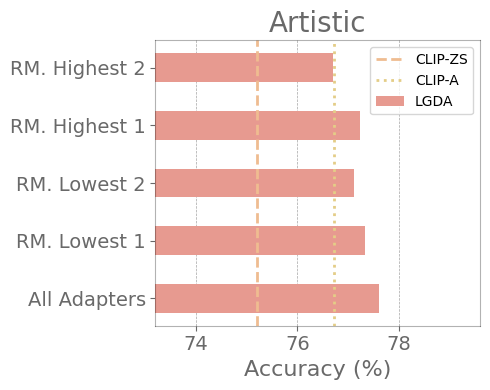

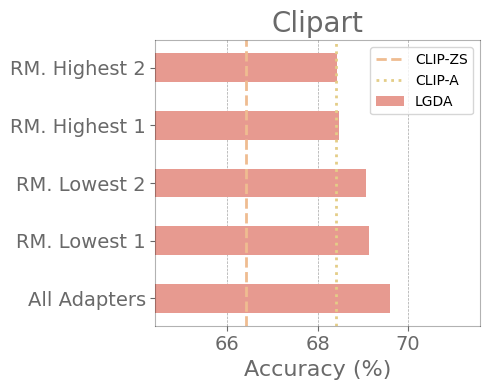

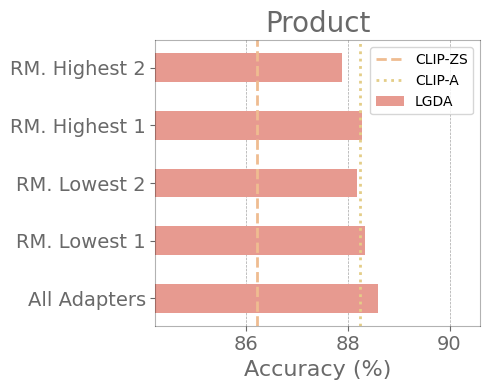

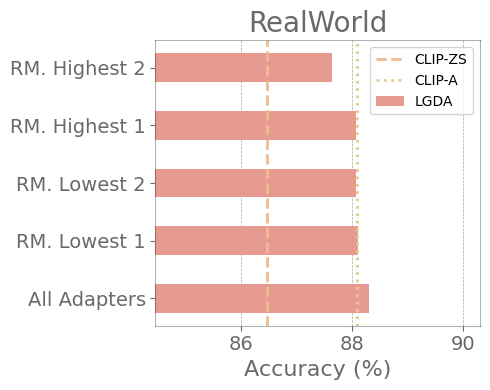

In [69]:
# Line plot function for a specific dataset with customized appearance
def plot_results_for_officehome(data, baseline, configurations, standard_deviation):
    dataset_name = "OfficeHome"
    domains = list(data[dataset_name].keys())
    
    for domain in domains:
        fig, ax = plt.subplots(figsize=(4, 4))
        accuracies = data[dataset_name][domain]
        std_devs = standard_deviation[dataset_name][domain]  # Get standard deviations for the domain
        if accuracies:  # Only plot if there are accuracies to plot
            # Create line chart for accuracies with standard deviation
            ax.errorbar(configurations, accuracies, yerr=std_devs, label='DDGE', color='#25B3E2', capsize=4, linewidth=2, marker='o')
            
            # Plot baseline values as horizontal lines
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-ZS" else ':'
                color = '#248232' if method == "CLIP-ZS" else '#791E94'
                ax.axhline(y=value, linestyle=linestyle, label=method, linewidth=2.5, color=color)
                
            # Set labels
            ax.set_ylabel("Accuracy (%)", fontsize=16)
            ax.set_xticks(range(len(configurations)))
            ax.set_xticklabels(configurations, rotation=40)
            ax.tick_params(axis='x', labelsize=14)
            ax.tick_params(axis='y', labelsize=14)
            ax.set_ylim(min(accuracies + list(baseline[dataset_name][domain].values())) - 1, 
                        max(accuracies + list(baseline[dataset_name][domain].values())) + 2)
            ax.legend(fontsize=13)
            
            # Lighten border lines
            ax.spines['top'].set_alpha(0.5)
            ax.spines['right'].set_alpha(0.5)
            ax.spines['left'].set_alpha(0.5)
            ax.spines['bottom'].set_alpha(0.5)
            
        plt.tight_layout()
        plt.savefig(f"./NumAda_OfficeHome_Results_{domain}_Styled_Line.pdf")  # Save each figure as a separate PDF
        plt.show()

# Generate and save the line charts for the "OfficeHome" dataset
plot_results_for_officehome(data, baseline, configurations, standard_deviation)